<a href="https://colab.research.google.com/github/Sylvielly/F-sica-Computacional/blob/main/sylvielly_relato_codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sylvielly_iluminancia_dados.CSV to sylvielly_iluminancia_dados (2).CSV
Primeiras linhas do DataFrame:
   Time (s)  Illuminance (lx)
0      0.00              31.0
1      0.20              30.0
2      0.32              29.0
3      0.40              28.0
4      0.80              27.0
--- Estatísticas para Time (s) ---
Média: 8.68
Mediana: 9.29
Moda: 0.0
Desvio Padrão: 5.17
Valor Máximo: 17.43
Valor Mínimo: 0.0
Amplitude: 17.43
Variância: 26.75

--- Estatísticas para Illuminance (lx) ---
Média: 29.62
Mediana: 29.00
Moda: 29.0
Desvio Padrão: 2.67
Valor Máximo: 35.0
Valor Mínimo: 23.0
Amplitude: 12.00
Variância: 7.15



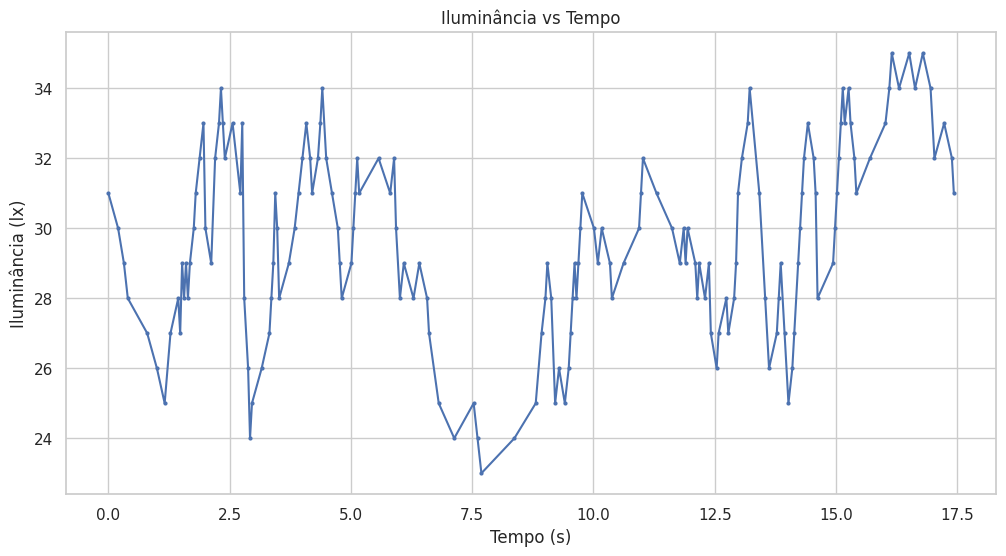

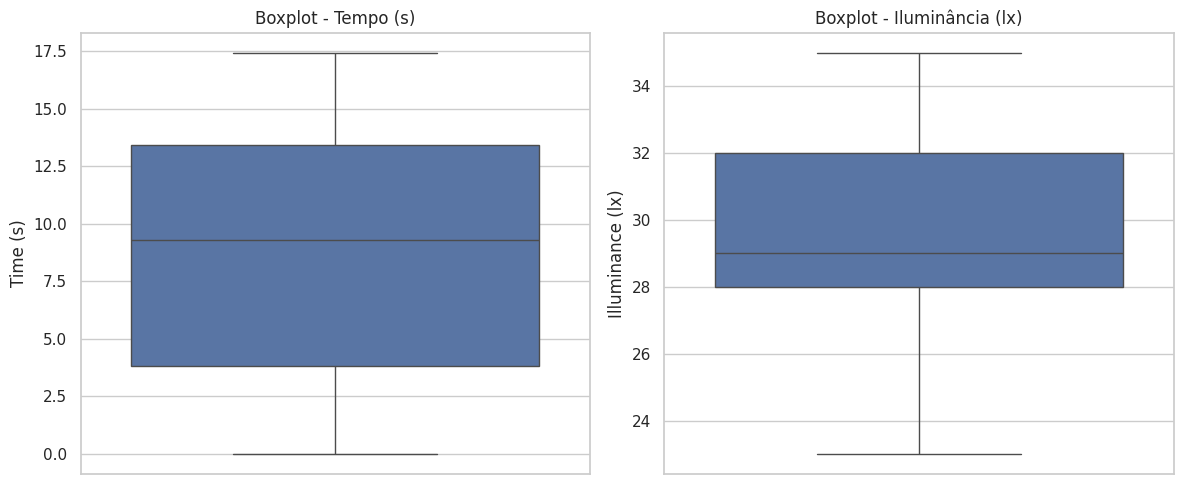

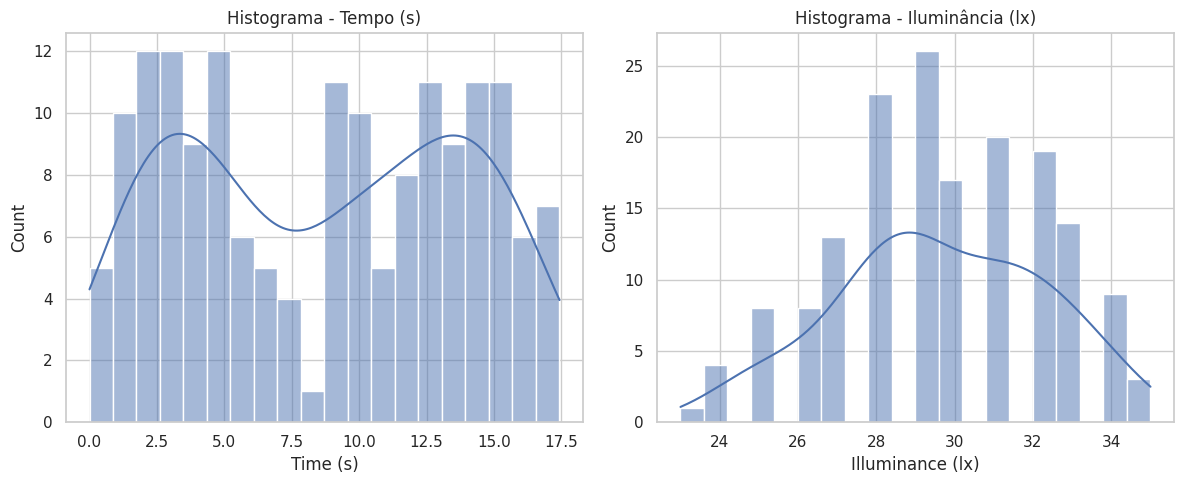

In [5]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# 1. Importar o arquivo CSV (upload manual no Colab)
from google.colab import files
uploaded = files.upload()

# Suponha que o arquivo se chama 'sylvielly_iluminancia_dados.csv'
# Ajuste o nome conforme seu arquivo

# 2. Ler o CSV para DataFrame
# CORREÇÃO AQUI: Mudei 'delimiter=\t' para 'sep=;'
# mantive 'decimal=,' pois seus números usam vírgula como decimal
df = pd.read_csv('sylvielly_iluminancia_dados.csv', sep=';', decimal=',')

# 3. Mostrar as primeiras linhas
print("Primeiras linhas do DataFrame:")
print(df.head())

# 4. Estatísticas descritivas customizadas para cada coluna numérica
def estatisticas(col):
    print(f"--- Estatísticas para {col} ---")
    print(f"Média: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    try:
        # Usar .dropna() para garantir que a moda seja calculada apenas em valores válidos
        moda = df[col].dropna().mode()
        if not moda.empty:
            print(f"Moda: {moda[0]}")
        else:
            print("Moda: sem valor único ou todos NaN")
    except Exception as e:
        print(f"Erro ao calcular Moda: {e}")
        print("Moda: sem valor único ou erro")

    print(f"Desvio Padrão: {df[col].std():.2f}")
    print(f"Valor Máximo: {df[col].max()}")
    print(f"Valor Mínimo: {df[col].min()}")
    print(f"Amplitude: {df[col].max() - df[col].min():.2f}")
    print(f"Variância: {df[col].var():.2f}\n")

# Verifica se as colunas são numéricas antes de calcular estatísticas
# Isso evita erros se alguma coluna for lida como string devido a dados mistos
for coluna in df.columns:
    if pd.api.types.is_numeric_dtype(df[coluna]):
        estatisticas(coluna)
    else:
        print(f"Coluna '{coluna}' não é numérica e será ignorada para estatísticas.")
        # Se você suspeitar que deveria ser numérica, verifique o head() e os tipos de dados

# 5. Gráfico Cartesiano (linha) do Time x Illuminance
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df['Illuminance (lx)'], marker='o', linestyle='-', markersize=2) # Adicionei linestyle e markersize para melhor visualização
plt.title('Iluminância vs Tempo') # Traduzido o título
plt.xlabel('Tempo (s)') # Traduzido o label
plt.ylabel('Iluminância (lx)') # Traduzido o label
plt.grid(True)
plt.show()

# 6. Boxplot para cada variável
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Time (s)'])
plt.title('Boxplot - Tempo (s)') # Traduzido o título
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Illuminance (lx)'])
plt.title('Boxplot - Iluminância (lx)') # Traduzido o título
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# 7. Histograma para cada variável
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Time (s)'], bins=20, kde=True) # Aumentei os bins para mais detalhes
plt.title('Histograma - Tempo (s)') # Traduzido o título
plt.subplot(1, 2, 2)
sns.histplot(df['Illuminance (lx)'], bins=20, kde=True) # Aumentei os bins para mais detalhes
plt.title('Histograma - Iluminância (lx)') # Traduzido o título
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()